# Using $He^4_2$ atom to Demostrate Hartree-Fock SCF Method
## Expectation value for neutral Helium atom; $He^4_2$

$$
    \langle \Psi | \hat{H} | \Psi \rangle = 
    2 \langle \psi | \hat{h} | \psi \rangle 
    + \langle \psi \psi  | \hat{V}_{12} | \psi \psi\rangle 
$$

## Hartree-Fock energy:

$$
E^{HF} = min_{\Psi} \langle \Psi | \hat{H} | \Psi \rangle
$$

- Reference:

     Am. J. Phys. 2021, 89, 426.
"A first encounter with the Hartree-Fock self-consistent-field method"

### Pseudo-code: 
1. Import libraries 
2. Parameters setting 
3. Main part: HF-SCF iteration 
4. Plot results

In [78]:
# 1. Import libraries

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  

In [79]:
# 2. Parameters setting 

# Atomic number, i.e. the number of protons in the nucleus of an atom
Z = 2

# Number of SCF itrations
num_iter = 20

# Parameters from Table 1
#  two orbital energies
eps_1 = - (Z ** 2) / 2
eps_2 = - (Z ** 2) / 8
#  Cloulomb and Exchange integrals 
I_1111 = (5/8) * Z
I_1112 = (2**12 / 7**4) * (np.sqrt(2) / 27) * Z
I_1122 = (16 / 9**3) * Z
I_1212 = (17 / 3**4) * Z
I_1222 = (2**9 / 5**5) * (np.sqrt(2)/27) * Z
I_2222 = (77/2**9) * Z

In [101]:
# 3. Main part: HF-SCF iteration

# Initialization of the HF SCF procedure:
theta = 0
f_theta = []
f_theta.append([0, theta])

f_total_energy = []
f_orbital_energy = []

# Loop for carrying out the iterative SCF procedure:
for i in range(num_iter):
    c_1 = np.cos(theta) # Eq.(16)
    c_2 = np.sin(theta) # Eq.(17)
    # print(c_1,c_2)

    # Calculation of the two-electron energy [Eq.(13)]:
    total_energy = 2 * ( eps_1 * c_1**2 + eps_2 * c_2**2 )   
    + I_1111 * c_1**4 + 4 * I_1112 * c_1**3 * c_2 
    + 2 * ( 2 * I_1122 + I_1212) * c_1**2 * c_2**2 
    + 4 * I_1222 * c_1 * c_2**3 
    + I_2222 * c_2**4
    f_total_energy.append([i,total_energy])

    # Calculation of the matrix elements of the Fock matrix:
    # Eq.(23)  
    F_11 = eps_1 + I_1111 * c_1**2
    + 2 * I_1112 * c_1 * c_2 + I_1212 * c_2**2 
    # Eq.(24)
    F_12 = I_1112 * c_1**2 + 2 * I_1122 * c_1*c_2
    + I_1222 * c_2**2 
    # Eq.(25)
    F_21 = F_12 
    # Eq.(26)
    F_22 = eps_2 + I_1212 * c_1**2
    + 2 * I_1222 * c_1 * c_2 + I_2222 * c_2**2

    # Calculation of the lower of the two roots of the characteristic polynomial of the Fock matrix, using the quadratic formula:
    orbital_energy = 0.5*(F_11 + F_22) 
    - np.sqrt( 0.25*(F_11 - F_22)**2 + F_12**2 )
    f_orbital_energy.append([i+1, orbital_energy])

    # For a given Fock matrix and orbital energy, Eq.(22) corresponds to a simple linear system for c_1 and c_2. By analytically solving this system, an explicit expression for the polar angle theta is obtained. This expression is used in the following for updating
    # FIXME: theta:
    theta1 = np.arctan ((orbital_energy - F_11)/F_12)
    theta2 = np.arctan (F_12 / (orbital_energy - F_22))
    theta = theta2
    # print(theta1,theta2)
    f_theta.append([i+1, theta])

# Celationship between total energy and theta 
f_theta_E = np.array([ 
    f_theta[0:len(f_theta) - 1, 1] ,
    f_total_energy[:,1]
    ])
f_theta_E = np.transpose(f_theta_E)
f_theta_E = f_theta_E[f_theta_E[:,0].argsort()]

# Change variable datatype in order to plot figures
f_theta = np.array(f_theta)
f_total_energy = np.array(f_total_energy)
f_orbital_energy = np.array(f_orbital_energy)

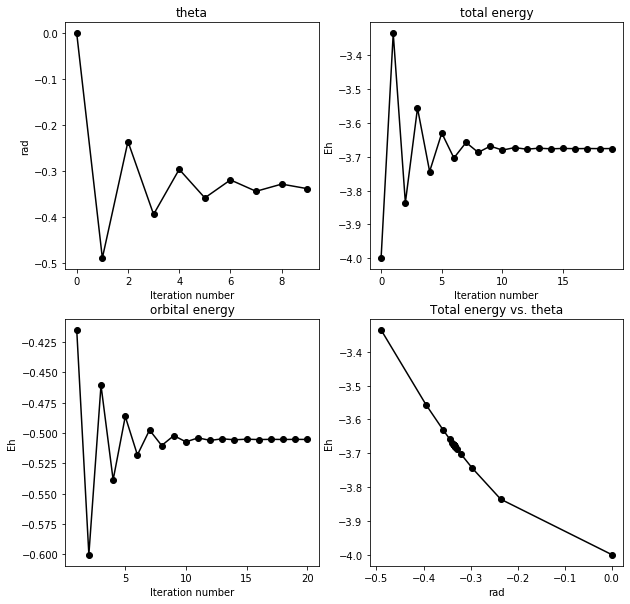

In [111]:
# 4. Plot result
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0, 0].plot(f_theta[0:10,0],f_theta[0:10,1],'k',marker='o')
ax[0, 1].plot(f_total_energy[:,0],f_total_energy[:,1],'k',marker='o')
ax[1, 0].plot(f_orbital_energy[:,0],f_orbital_energy[:,1],'k',marker='o')
ax[1, 1].plot(f_theta_E[:,0],f_theta_E[:,1],'k',marker='o')

ax[0, 0].set_title('theta')
ax[0, 1].set_title('total energy')
ax[1, 0].set_title('orbital energy')
ax[1, 1].set_title('Total energy vs. theta')

ax[0, 0].set_xlabel('Iteration number')
ax[0, 1].set_xlabel('Iteration number')
ax[1, 0].set_xlabel('Iteration number')
ax[1, 1].set_xlabel('rad')

ax[0, 0].set_ylabel('rad')

ax[0, 1].set_ylabel('Eh')
ax[1, 0].set_ylabel('Eh')
ax[1, 1].set_ylabel('Eh')

# save figure for different tests
PATH = '../aux/'
name = 'test'
fig.savefig(PATH + name + '.png')